# Data Visualization and Processing
---
By: Kris Ghimire, Thad Schwebke, Walter Lai, and Jamie Vo
<img src="Images/broken-1391025_1280.JPG" alt="Crime" style="width: 80%;"/>
Photo Cred.: Photo by kat wilcox from Pexels

In [106]:
import pandas as pd
import numpy as np
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# visualizations libraries
import seaborn as sns
import plotly 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#from geopy.geocoders import Nominatim
%matplotlib inline

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [105]:
%conda install geopy

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - geopy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.





Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


### Business Understanding (10 pts)
---

#### Purpose of the dataset.
[Homocide Data](https://www.kaggle.com/murderaccountability/homicide-reports)

(i.e., why was this data collected in
the first place?). 

The Murder Accountability Project is a nonprofit organization that discovers discrepancies between the reported homicides between medical examiners and the FBI voluntary crime report. The database is considered to be one of the most exhaustive record collection of homicides that is currently avaiable for the US. Additional information about the organization can be found at [Murder Accountability Project](http://www.murderdata.org/).

The dataset dates back to 1967 and includes demographic information such as gender, age, and ethnicity. A more in depth description of the attributes may be found in the [Data Description](#Data_Description) section.

In [3]:
# read in the data
df = pd.read_csv('../Data/database.csv')

In [4]:
# print the number of records and columns
records = len(df)
attributes = df.columns

print(f'No. of Records: {records} \nNo. of Attributes: {len(attributes)}')

No. of Records: 638454 
No. of Attributes: 24


#### Define and measure the dataset outcomes.
That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? 

#### Model Statistics
How would you measure the effectiveness of a
good prediction algorithm? Be specific.

### Data Understanding (80 pts total)
---
<a id="Data_Description"></a>
#### [10 points]  Data Description:
Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

#### [15 points] Verify data quality: 
Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.

In [6]:
# check if there are any duplicate in dataset
# create function that checks duplicate
# take parameter name p_Agency Code
# if duplicate return true else return false
def checkDuplicate (len_instances):
    '''check if give list contains any duplicates'''
    if len_instances == set_intances:
        return False
    else:
        return True
    
# How many dublicate instances are present in dataset?
len_instances = len(df['Agency Code'])
set_intances=len(set(df['Agency Code']))
# lets check if duplicate instances are present
dup_result = checkDuplicate (len_instances)
if dup_result:
    print('YES,duplicate instances present')
else:
    print('NO, duplicate instances are present')

YES,duplicate instances present


In [7]:

dif = len_instances-set_intances
print('Total number of duplicate instances in dataset are:',dif)

Total number of duplicate instances in dataset are: 626451


In [8]:
df['Victim Age'].min(),df['Victim Age'].max()

(0, 998)

In [14]:
df.replace(to_replace=' ',value=-1,inplace=True)
# convert object variable 'Perpetratrator age' into int
df['Perpetrator Age']=pd.to_numeric(df['Perpetrator Age'])
# replace all the empty value ' ' with -1 
# replace all the -1  values with nan 
df = df.replace(to_replace=-1,value=np.nan)
df.isnull().values.any()  
df.isnull().sum() 

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [15]:
df['Perpetrator Age'].max(),df['Perpetrator Age'].min()  

(99.0, 0.0)

In [18]:

 #what is the min and max age of Perpetrator?
print('Max age of Perpetrator:',df['Perpetrator Age'].max())
print('Min age of Perpetrator:',df['Perpetrator Age'].min())

Max age of Perpetrator: 99.0
Min age of Perpetrator: 0.0


In [20]:
df.median()


Record ID            319227.5
Year                   1995.0
Incident                  2.0
Victim Age               30.0
Perpetrator Age          21.0
Victim Count              0.0
Perpetrator Count         0.0
dtype: float64

In [21]:
# check which col has any nan values 
df.loc[df.isna().any(axis=1)] 

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
634666,634667,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,...,Not Hispanic,Unknown,NaN,Unknown,Unknown,Unknown,Handgun,0,0,FBI


In [37]:
#impute median for perp age
df.loc[df['Perpetrator Age'].isna(),'Perpetrator Age']=df['Perpetrator Age'].median()
df['Perpetrator Age']=df['Perpetrator Age'].apply(lambda x:int(x))
df.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age           int64
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [31]:
df.isnull().sum() 

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [38]:
print('Total number victims=',df_imputed['Victim Count'].sum() )
#Age of Victim indicates the age or age range of an individual (person) 
#victim in an incident when the crime occurred.
#Valid Data Values
#1 – 98= Years Old
#0 = Unknown
# above 98 invalid data value
# Victim age > 100 ???
df_imputed[df_imputed['Victim Age'] > 98 ].shape 

Total number victims= 78743


(10255, 24)

In [39]:
df_imputed[df_imputed['Perpetrator Age']>98].shape 

(90, 24)

In [40]:
df_imputed[df_imputed['Perpetrator Age']>98].shape 
# Total number of instances with Perpetrator Age greater than 98 are:90 

(90, 24)

In [41]:
# find all the perpetrator with age zero 
df_imputed[df_imputed['Perpetrator Age']==0].shape
# Total number of instances with Perpetrator Age equal to 0 are: 216327


(216327, 24)

In [ ]:
import seaborn as sns
sns.distplot(df['Perpetrator Age'])

In [ ]:
df['Perpetrator Age'].count() 

In [42]:
print('Maximum number of incident was:',df_imputed['Incident'].max())
print('Min number of incident was:',df_imputed['Incident'].min()) 
216327 /df['Perpetrator Age'].count() *100 

Maximum number of incident was: 999
Min number of incident was: 0


33.882942232329974

In [43]:
# how to say this consicely?
median_perp_age = df[ df['Perpetrator Age'] != 0 ].loc[:,'Perpetrator Age'].median()
median_perp_age

27.0

In [44]:
#before imputation we had this many perp ages with median age
num_median = df['Perpetrator Age'].value_counts()[median_perp_age]
num_median

14136

In [45]:
#before imputation we had this many perp ages of 0
zero_indices=df[df['Perpetrator Age']==0.0].index

#https://stackoverflow.com/questions/53482760/filter-data-frame-based-on-index-value-in-python/53482813
num_zeroes = df[df.index.isin(zero_indices)].loc[:,'Perpetrator Age'].count()
num_zeroes

216327

In [46]:
#after imputation we should get this many values in the median perp age count
num_zeroes + num_median

230463

In [47]:
#after imputation the number of perp ages at median age should be equal to number of zeroes and previous number median age
df.loc[df.index.isin(zero_indices),'Perpetrator Age']=median_perp_age
df['Perpetrator Age'].value_counts()[median_perp_age]

230463

In [49]:
# check that the zeroes were all added to the median value count
(num_median + num_zeroes) == df['Perpetrator Age'].value_counts()[median_perp_age]

True

In [ ]:
#0s are gone
sns.distplot(df['Perpetrator Age'])

In [50]:
#before median imputation How many homicides had a victim of age 998?
df['Victim Age'].value_counts()[998]

974

In [51]:
#before median imputation How many homicides had a victim of median age?
median_vic_age=df['Victim Age'].median()
df['Victim Age'].value_counts()[median_vic_age]

18966

In [52]:
#after imputation we should have  974 MORE homicides in the median victim age category
df.loc[df['Victim Age']==998,'Victim Age']=median_vic_age
df['Victim Age'].value_counts()[median_vic_age]

19940

In [96]:
#statistics section
ct = pd.crosstab(df['Victim Race'],
                 df['Victim Sex'],
                margins=True,
                margins_name='Total')
ct

SyntaxError: invalid syntax (<ipython-input-96-7be3578f8192>, line 2)

In [61]:
df_categorical = df.select_dtypes(include='object')
df_categorical.describe()

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
count,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454
unique,12003,9216,7,1782,51,12,2,2,3,5,3,3,5,3,28,16,2
top,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Unknown,Handgun,FBI
freq,38416,38416,493026,44511,99783,58696,629338,448172,494125,317422,368303,399541,218243,446410,273013,317484,616647


In [62]:
# get all levels per categorical attribute
df_categorical_levels = pd.DataFrame()
df_categorical_levels['Attribute'] = df_categorical.columns
df_categorical_levels['Levels'] = ''
df_categorical_levels['Levels_Count'] = ''
df_categorical_levels['Unknown_Count'] = ''

# populate the dataframe with categorical levels and count of each category
for i, row in df_categorical_levels.iterrows():
    attribute = row['Attribute']
    df_categorical_levels.at[i,'Levels'] = df[attribute].unique()
    df_categorical_levels.at[i,'Levels_Count'] = len(df[attribute].unique())
    try:
        df_categorical_levels.at[i,'Unknown_Count'] = df.groupby(attribute).count().loc['Unknown'][0]
    except: 
        df_categorical_levels.at[i,'Unknown_Count'] = 0
df_categorical_levels.sort_values(by='Unknown_Count', ascending = False)

,Attribute,Levels,Levels_Count,Unknown_Count
13,Perpetrator Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,446410
10,Victim Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,368303
14,Relationship,"[Acquaintance, Unknown, Wife, Stranger, Girlfr...",28,273013
12,Perpetrator Race,"[Native American/Alaska Native, White, Unknown...",5,196047
11,Perpetrator Sex,"[Male, Unknown, Female]",3,190365
15,Weapon,"[Blunt Object, Strangulation, Unknown, Rifle, ...",16,33192
9,Victim Race,"[Native American/Alaska Native, White, Black, ...",5,6676
8,Victim Sex,"[Male, Female, Unknown]",3,984
1,Agency Name,"[Anchorage, Juneau, Nome, Bethel, North Slope ...",9216,47
0,Agency Code,"[AK00101, AK00103, AK00106, AK00113, AK00118, ...",12003,0


In [63]:
# basic statistics for continuous variables
df.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.00000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,33.55677,29.471093,0.123334,0.185224
std,184305.93872,9.927693,92.149821,17.77956,10.555174,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.00000,24.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.00000,27.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,41.00000,31.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,99.00000,99.000000,10.000000,10.000000


In [64]:
df.groupby('Victim Age').count()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Victim Age,,,,,,,,,,,,,,,,,,,,,
0.0,8444,8444,8444,8444,8444,8444,8444,8444,8444,8444,...,8444,8444,8444,8444,8444,8444,8444,8444,8444,8444
1.0,5525,5525,5525,5525,5525,5525,5525,5525,5525,5525,...,5525,5525,5525,5525,5525,5525,5525,5525,5525,5525
2.0,3805,3805,3805,3805,3805,3805,3805,3805,3805,3805,...,3805,3805,3805,3805,3805,3805,3805,3805,3805,3805
3.0,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,...,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378
4.0,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,...,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
96.0,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
97.0,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39


#### [15 points] Visualization
Visualize the most important attributes appropriately (at least 5 attributes).
Important: Provide an interpretation for each chart. Explain for each attribute why the
chosen visualization is appropriate.

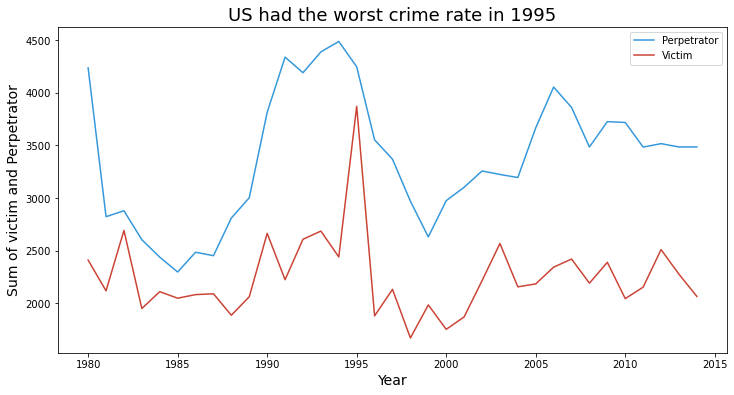

In [67]:
import matplotlib.pyplot as plt
df2 = df.groupby(by=['Year'])['Victim Count','Perpetrator Count','Incident'].sum().reset_index()
vp=df2
plt.figure(figsize=(12,6))
plt.plot(vp.Year,vp['Perpetrator Count'],color='#3498DB',label='Perpetrator')
plt.plot(vp.Year,vp['Victim Count'],color='#CB4335',label='Victim')
#plt.plot(vp.year,vp['Incident'],color='green',label='Incident')
plt.title('US had the worst crime rate in 1995',size=18)
plt.legend()
plt.xlabel('Year',size=14)
plt.ylabel('Sum of victim and Perpetrator',size=14)
plt.show() 

No handles with labels found to put in legend.


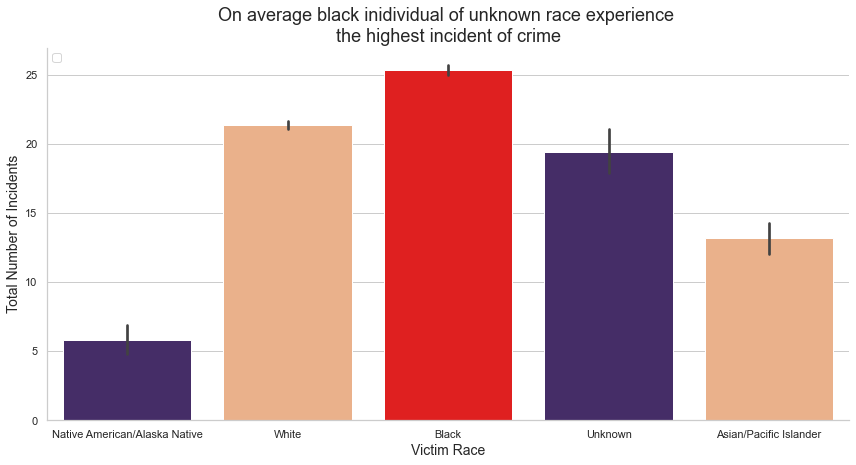

In [97]:
# swap y with Count of Record iD
sns.set(style='whitegrid')
sns.catplot(x='Victim Race',
            y='Incident',
            kind='bar',
            height=6, # makes the height 6 units high
            aspect=2, # height should be 2 times width
            data=df,
            
            legend=False, # remove default legend
           palette=['#432371',"#FAAE7B",'red'])
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Number of Incidents',size=14)
plt.title('On average black inidividual of unknown race experience \n the highest incident of crime ',size=18)
plt.legend(loc='upper left')
plt.show() 

Victim Sex,Female,Male,Unknown,Total
Victim Race,,,,
Asian/Pacific Islander,2953,6935,2,9890
Black,52083,247775,41,299899
Native American/Alaska Native,1218,3348,1,4567
Unknown,1352,4439,885,6676
White,85739,231628,55,317422
Total,143345,494125,984,638454


In [71]:

ct2 = pd.crosstab(df['Victim Race'],
                 df['Victim Sex'],
                margins=True,
                margins_name='Total',
                normalize='columns')*100 # to percentage 
ct2

Victim Sex,Female,Male,Unknown,Total
Victim Race,,,,
Asian/Pacific Islander,2.060065,1.403491,0.203252,1.549054
Black,36.334019,50.144194,4.166667,46.972687
Native American/Alaska Native,0.849698,0.677561,0.101626,0.715322
Unknown,0.943179,0.898356,89.939024,1.045651
White,59.813038,46.876398,5.589431,49.717286


In [72]:
ct3 = pd.crosstab(df['Crime Type'],[df['Victim Sex'],df['Victim Race']],
                 margins=True,
                  margins_name='Total'
                 )
ct3

Victim Sex                                 Female         \
Victim Race                Asian/Pacific Islander  Black   
Crime Type                                                 
Manslaughter by Negligence                     40    610   
Murder or Manslaughter                       2913  51473   
Total                                        2953  52083   

Victim Sex                                                               \
Victim Race                Native American/Alaska Native Unknown  White   
Crime Type                                                                
Manslaughter by Negligence                            40      10   1548   
Murder or Manslaughter                              1178    1342  84191   
Total                                               1218    1352  85739   

Victim Sex                                   Male          \
Victim Race                Asian/Pacific Islander   Black   
Crime Type                                                  
Manslaughter by Negligence                     74    2056   
Murder or Manslaughter                       6861  245719   
Total                                        6935  247775   

Victim Sex                                                                \
Victim Race                Native American/Alaska Native Unknown   White   
Crime Type                                                                 
Manslaughter by Negligence                           103      26    4598   
Murder or Manslaughter                              3245    4413  227030   
Total                                               3348    4439  231628   

Victim Sex                                Unknown        \
Victim Race                Asian/Pacific Islander Black   
Crime Type                                                
Manslaughter by Negligence                      0     0   
Murder or Manslaughter                          2    41   
Total                                           2    41   

Victim Sex                                                               Total  
Victim Race                Native American/Alaska Native Unknown White          
Crime Type                                                                      
Manslaughter by Negligence                             0      10     1    9116  
Murder or Manslaughter                                 1     875    54  629338  
Total                                                  1     885    55  638454

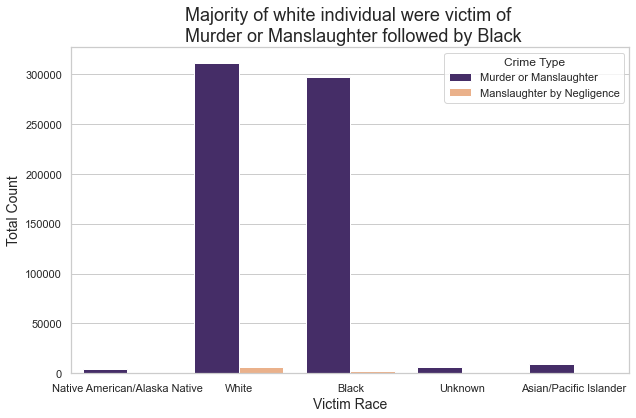

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='Victim Race',
              #y='Crime Type',
              hue='Crime Type',
              palette=['#432371',"#FAAE7B"] 
             )
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Count',size=14)
plt.title('Majority of white individual were victim of \n Murder or Manslaughter followed by Black',size=18)
plt.show() 

In [74]:
#put with thad's
ct4= pd.crosstab(df['Weapon'],df['Crime Type'],normalize='columns',margins=True).round(2)*100  
ct4

Crime Type,Manslaughter by Negligence,Murder or Manslaughter,All
Weapon,,,
Blunt Object,7.0,11.0,11.0
Drowning,2.0,0.0,0.0
Drugs,3.0,0.0,0.0
Explosives,0.0,0.0,0.0
Fall,0.0,0.0,0.0
Fire,2.0,1.0,1.0
Firearm,5.0,7.0,7.0
Gun,0.0,0.0,0.0
Handgun,40.0,50.0,50.0


In [75]:
#ct5 = pd.crosstab(df['Crime Type'],df['Crime Solved'])


ct5 = pd.crosstab(df['Agency Type'],
                  df['Crime Type'],
                  
                   
                 )  
ct5

Crime Type,Manslaughter by Negligence,Murder or Manslaughter
Agency Type,,
County Police,382,22311
Municipal Police,5819,487207
Regional Police,11,224
Sheriff,2475,102847
Special Police,73,2816
State Police,352,13883
Tribal Police,4,50


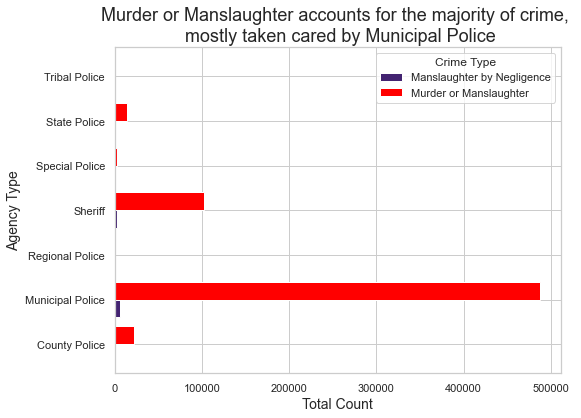

In [76]:

ct5.plot(kind='barh', 
         #stacked=True, 
         color=['#432371','red'],
         width=0.8,  
         figsize=(8,6) # (x-axis,y-axis)
         )
plt.xlabel('Total Count',size=14)
plt.ylabel('Agency Type',size=14)
plt.title('Murder or Manslaughter accounts for the majority of crime, \n mostly taken cared by Municipal Police',size=18)
plt.show() 

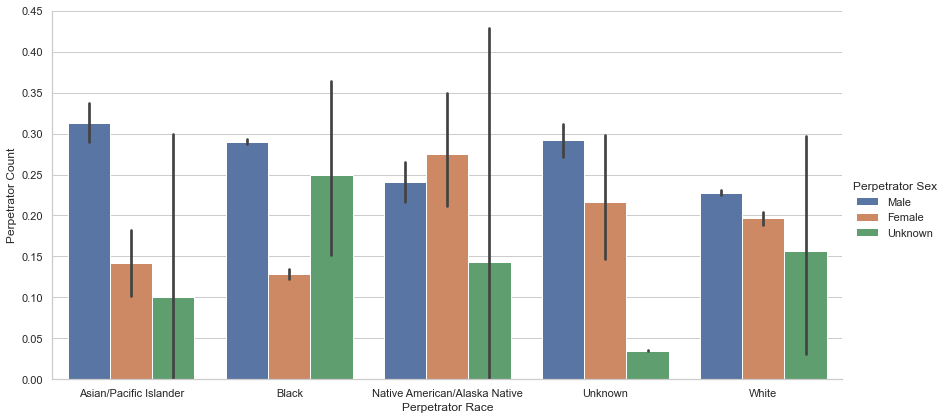

In [77]:
sns.catplot(x='Perpetrator Race',
           y='Perpetrator Count',
           kind='bar', 
           height=6,
            aspect=2,
            hue='Perpetrator Sex', 
           data=df.sort_values('Perpetrator Race'))

In [78]:
Perpetrator_Count_greater_than_zero = df[df['Perpetrator Count'] > 0 ]
Perpetrator_Count_greater_than_zero.head() 

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,27.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40.0,Unknown,Unknown,Unknown,Firearm,0,1,FBI
10,11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,...,Unknown,Unknown,27.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
17,18,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980,November,1,Murder or Manslaughter,...,Unknown,Male,23.0,Native American/Alaska Native,Unknown,Brother,Blunt Object,0,1,FBI
54,55,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,...,Not Hispanic,Male,26.0,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI


In [79]:
gp_prace = Perpetrator_Count_greater_than_zero.groupby(by='Perpetrator Race').sum ().reset_index()  
gp_prace

,Perpetrator Race,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
0,Asian/Pacific Islander,352897550,2039041,12280,28983.0,24405.0,369,1787
1,Black,13713485920,75721313,982465,1166576.0,901165.0,6104,58199
2,Native American/Alaska Native,194853495,1108594,3386,19233.0,14278.0,64,886
3,Unknown,1796688060,14494773,128286,252707.0,196574.0,3231,8360
4,White,11040973734,65623469,672997,1083144.0,858849.0,7279,49025


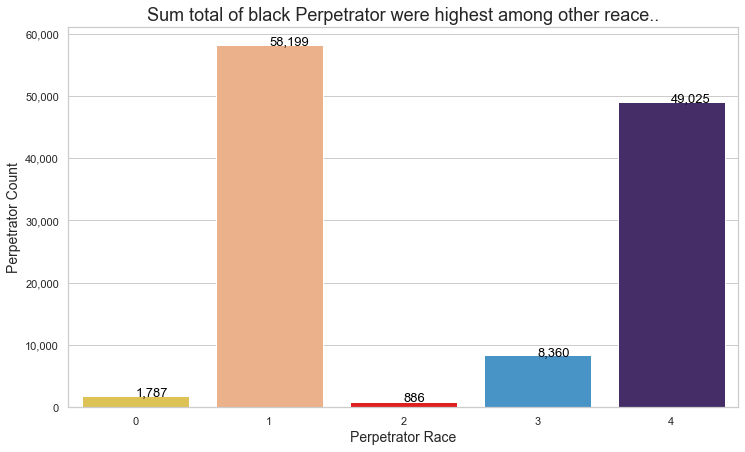

In [80]:
plt.figure(figsize=(12,7))   
# plot barh chart with index as x values
ax = sns.barplot(gp_prace.index,  
                 gp_prace['Perpetrator Count'],
                 palette=['#F4D03F',"#FAAE7B",'red','#3498DB','#432371'])

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
for i, v in enumerate(gp_prace["Perpetrator Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black',size=13) 
plt.title('Sum total of black Perpetrator were highest among other reace..',size=18)
plt.xlabel('Perpetrator Race',size=14)
plt.ylabel('Perpetrator Count',size=14) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A082171AC8>,
      dtype=object)

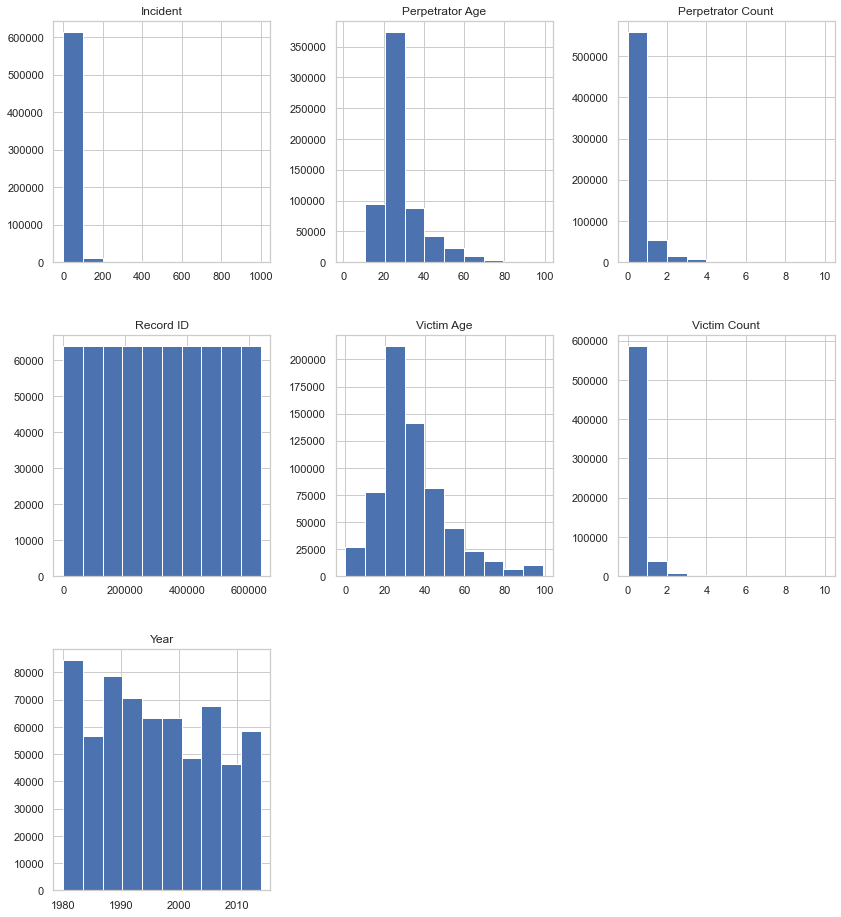

In [82]:
df.hist(bins=10,figsize=(14,16),layout=(3,3)) 

#### [15 points] EDA
Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.

In [90]:
# https://gist.github.com/rogerallen/1583593
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhodes Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

#New York: n homicides, New Jersey: n homicides
df_state = df.groupby('State').count().reset_index()

#NY: n homicides, NJ: n homicides
df_state['State_Abb'] = [states[full_state] for full_state in df_state['State']]

In [98]:
# heat map of states 

fig = px.choropleth(locations=df_state['State_Abb'], 
                    locationmode="USA-states", 
                    color=df_state['Record ID'], 
                    color_continuous_scale='portland',
                    scope="usa")
fig.update_layout(
    title_text = 'Homicide Rates per State',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

In [114]:
solved_y

,Year,Crime Solved,Record ID,Agency Code,Agency Name,Agency Type,City,State,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
1,1980,Yes,16729,16729,16729,16729,16729,16729,16729,16729,...,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729
3,1981,Yes,15788,15788,15788,15788,15788,15788,15788,15788,...,15788,15788,15788,15788,15788,15788,15788,15788,15788,15788
5,1982,Yes,15060,15060,15060,15060,15060,15060,15060,15060,...,15060,15060,15060,15060,15060,15060,15060,15060,15060,15060
7,1983,Yes,14515,14515,14515,14515,14515,14515,14515,14515,...,14515,14515,14515,14515,14515,14515,14515,14515,14515,14515
9,1984,Yes,13245,13245,13245,13245,13245,13245,13245,13245,...,13245,13245,13245,13245,13245,13245,13245,13245,13245,13245
11,1985,Yes,13623,13623,13623,13623,13623,13623,13623,13623,...,13623,13623,13623,13623,13623,13623,13623,13623,13623,13623
13,1986,Yes,14820,14820,14820,14820,14820,14820,14820,14820,...,14820,14820,14820,14820,14820,14820,14820,14820,14820,14820
15,1987,Yes,13473,13473,13473,13473,13473,13473,13473,13473,...,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473
17,1988,Yes,13391,13391,13391,13391,13391,13391,13391,13391,...,13391,13391,13391,13391,13391,13391,13391,13391,13391,13391
19,1989,Yes,14179,14179,14179,14179,14179,14179,14179,14179,...,14179,14179,14179,14179,14179,14179,14179,14179,14179,14179


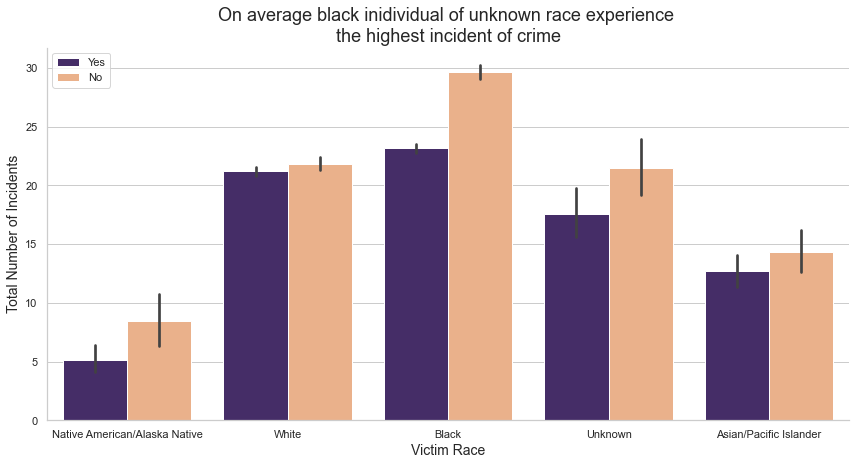

In [117]:
sns.set(style='whitegrid')
sns.catplot(x='Victim Race',
            y='Incident',
            kind='bar',
            height=6, # makes the height 6 units high
            aspect=2, # height should be 2 times width
            data=df,
            hue='Crime Solved',
            legend=False, # remove default legend
           palette=['#432371',"#FAAE7B",'red'])
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Number of Incidents',size=14)
plt.title('On average black inidividual of unknown race experience \n the highest incident of crime ',size=18)
plt.legend(loc='upper left')
plt.show() 

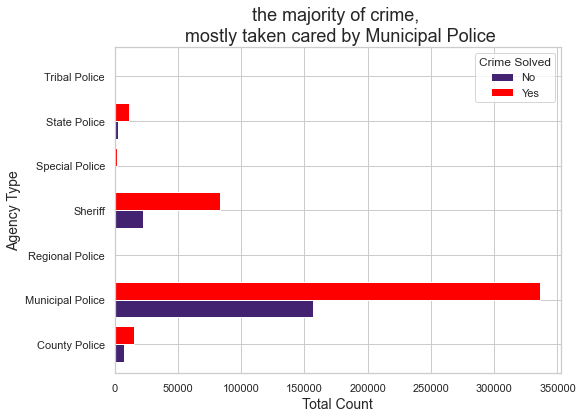

In [119]:

ct5 = pd.crosstab(df['Agency Type'],
                  df['Crime Solved'],
                  
                   
                 )  
ct5.plot(kind='barh', 
         #stacked=True, 
         color=['#432371','red'],
         width=0.8,  
         figsize=(8,6) # (x-axis,y-axis)
         )
plt.xlabel('Total Count',size=14)
plt.ylabel('Agency Type',size=14)
plt.title('the majority of crime, \n mostly taken cared by Municipal Police',size=18)
plt.show() 

#### [10 points] Discoveries
Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).

In [195]:

#solved_series=df.groupby(['Victim Sex','Crime Solved'])['Record ID'].count()/df.groupby(['Victim Sex'])['Record ID'].count()

#df_categorical.columns

crime_solved_df = pd.DataFrame()
crime_solved_df['Attribute']=df_categorical.columns[df_categorical.columns!='Crime Solved']
crime_solved_df['Response_Yes']=''

for index, row in crime_solved_df.iterrows():
  attribute=row['Attribute'] 
  solved_series=df.groupby([attribute,'Crime Solved'])['Record ID'].count()/df.groupby([attribute])['Record ID'].count()
  solved_df=solved_series.reset_index()
  crime_solved_df.at[index,'Response_Yes']= solved_df[solved_df['Crime Solved']=='Yes'][[attribute,'Record ID']]

In [200]:
solved_series=df.groupby(['Victim Sex','Crime Solved'])['Record ID'].count()/df.groupby(['Victim Sex'])['Record ID'].count()
ss=solved_series.reset_index()
ss[ss['Crime Solved']=='Yes'][['Victim Sex','Record ID']]
crime_solved_df=crime_solved_df.set_index('Attribute')
crime_solved_df.loc['Agency Code','Response_Yes']

,Agency Code,Record ID
1,AK00101,0.790769
3,AK00102,0.772277
5,AK00103,0.736842
7,AK00104,0.941176
9,AK00105,0.571429
...,...,...
18324,WY02103,1.000000
18325,WY02200,1.000000
18326,WY02201,1.000000
18327,WY02300,1.000000


In [ ]:
test_df=crime_solved_df.loc['Victim Sex','Response_Yes']
sns.catplot(kind='bar',x='Victim Sex',y='Record ID',data=test_df)

#### [5 points] New Feature Creation
Are there other features that could be added to the data or created from
existing features? Which ones?

In [83]:
# Function to create dummy variables
def dummy_code(col, df): # input the column names and dataframe
    df_dummy = pd.DataFrame()
    for val in col:
        df_dummy_temp = pd.get_dummies(df[val], prefix=val)
        df_dummy = pd.concat([df_dummy, df_dummy_temp], axis=1, sort=False)
    return df_dummy

In [84]:
# select columns for cummy coding
cat_col = df_categorical.columns.values
categorical = np.delete(cat_col, [0,1])

In [85]:
df_dummy = dummy_code(categorical, df)

In [92]:
# export to csv
df_full = pd.concat([df_dummy, df[df.describe().columns]], axis=1, sort=False)
df_full = pd.concat([df_dummy, df[['Agency Name', 'Agency Code']]], axis=1, sort=False)
df_full.to_csv('../Data/Dummy_coded_database.csv')

#### Exceptional Work (10 points total)
• You have free reign to provide additional analyses.
• One idea: implement dimensionality reduction, then visualize and interpret the results.

In [93]:
# scale the data
df_full = pd.read_csv('../Data/Dummy_coded_database.csv')

In [94]:
df_full.head()

,Unnamed: 0,Agency Type_County Police,Agency Type_Municipal Police,Agency Type_Regional Police,Agency Type_Sheriff,Agency Type_Special Police,Agency Type_State Police,Agency Type_Tribal Police,City_Abbeville,City_Acadia,...,Weapon_Poison,Weapon_Rifle,Weapon_Shotgun,Weapon_Strangulation,Weapon_Suffocation,Weapon_Unknown,Record Source_FBI,Record Source_FOIA,Agency Name,Agency Code
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,Anchorage,AK00101
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,Anchorage,AK00101
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,Anchorage,AK00101
3,3,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,Anchorage,AK00101
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,Anchorage,AK00101


In [95]:
df_full = df_full.drop('Unnamed: 0', axis=1)

In [ ]:
# set seed
random.seed(1234)
df_pca = df_full.drop(['Agency Name', 'Agency Code'], axis=1)
# split into train/test
y = df_pca['Crime Solved_Yes']
x = df_pca.drop(['Crime Solved_Yes', 'Crime Solved_No'], axis = 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x_train)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PCA_'+ str(x) for x in range(10)])

In [ ]:
df_PCA = pd.concat([principalDf, y], axis=1)

In [ ]:
fig = px.scatter(principalComponents, x=df_PCA['PCA_0'], y=df_PCA['PCA_1'], color=df_PCA['Crime Solved_Yes'])
fig.update_layout(title='PCA 1 vs. PCA 2',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.update_xaxes(title_text='PCA 1')
fig.update_yaxes(title_text='PCA 2')
fig.show()

In [ ]:
# check for a balanced dataset
df_crime = df_full[['Crime Solved_Yes', 'Crime Solved_No']].groupby('Crime Solved_Yes').count().reset_index().rename(columns={'Crime Solved_No':'Count'})
df_crime['Solved'] = ['No', 'Yes']
df_crime = df_crime.drop('Crime Solved_Yes', axis=1)
total = df_crime['Count'].sum()
df_crime['Percentage'] = [x/total for x in df_crime['Count']]
df_crime